In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import math as m

In [12]:
df = pd.DataFrame()

In [13]:
df = pd.read_clipboard()

In [ ]:
df


Test


In [ ]:
df.plot(x='Y', y ='X', kind ='scatter')


In [ ]:
plt.plot(df)
plt.show()

In [ ]:
import numpy as np

In [ ]:
from numpy.polynomial import polynomial as P

In [ ]:
df['ind'] = df.index

In [ ]:
df['ind']


0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
58    58
Name: ind, dtype: int64

# Distortion Calulation


In [ ]:
X_Diff = df['X'] - df['X'].shift(1)
avrg = X_Diff.mean()


In [ ]:
rowStart = df['X'][0]
rowStart

372

In [ ]:
dist = df['X'] - avrg*df['ind'] - rowStart
dist
df['Dist'] = dist

# Plot distortion and Find trendLine with poly coef

In [ ]:
# df = np.asfarray(df, float)
# df = df.astype(int)
df

,X,ind,Dist
0,372.0,0,0.000000
1,793.0,1,3.793103
2,1217.0,2,10.586207
3,1637.0,3,13.379310
4,2060.0,4,19.172414
5,2478.0,5,19.965517
6,2896.0,6,20.758621
7,3313.0,7,20.551724
8,3732.0,8,22.344828
9,4150.0,9,23.137931


In [ ]:
# df['X'] = df['X'].astype(float)
X = df['X'].astype(float)
# X = X.to_list()

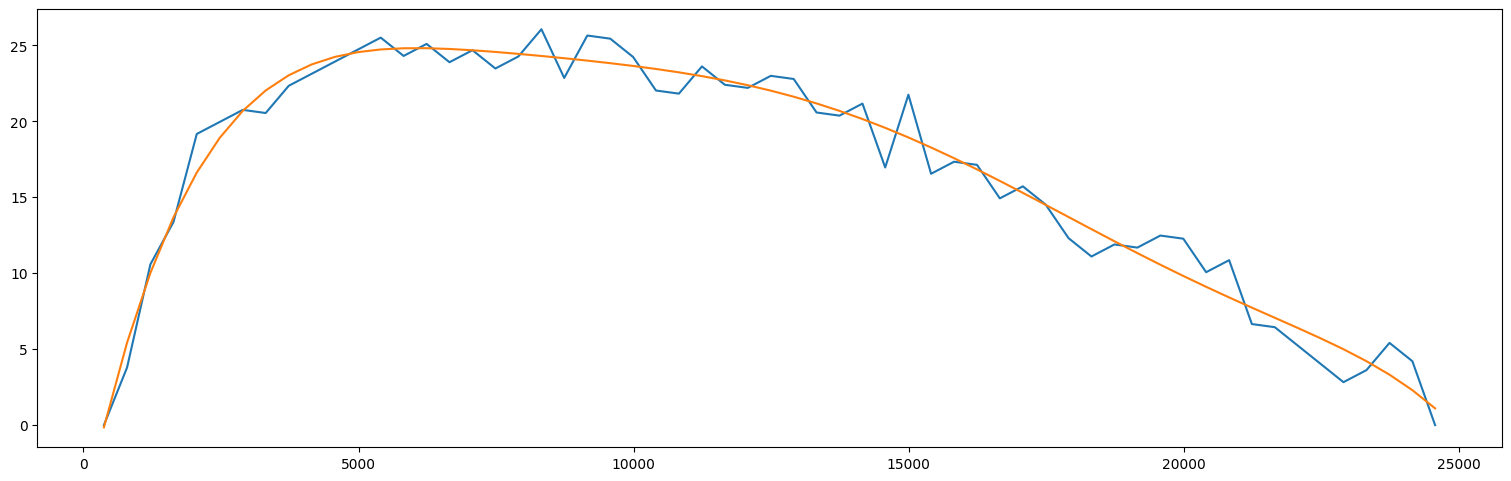

array([-6.06696443e+00,  1.72667746e-02, -3.80809593e-06,  4.25868764e-10,
       -2.55951320e-14,  7.70660674e-19, -9.12600845e-24])

In [ ]:
x=df['X']
y = df['Dist']
plt.figure(figsize=(15, 4.7), layout='constrained')
plt.plot(x, y)
#calculate equation for trendline
z = np.polyfit(x, y, 6)
p = np.poly1d(z)
c, stats = P.polyfit(x,y,6,full=True)
#add trendline to plot
plt.plot(x, p(x))
plt.show()
c

In [ ]:
c

array([-6.06696443e+00,  1.72667746e-02, -3.80809593e-06,  4.25868764e-10,
       -2.55951320e-14,  7.70660674e-19, -9.12600845e-24])

# Apply distortion poly formula

In [ ]:
dist_calc = []
for X in df['X']:
    calc = c[6]*m.pow(X,6) + c[5]*m.pow(X,5) + c[4]*m.pow(X,4) + c[3]*m.pow(X,3) + c[2]*m.pow(X,2) + c[1]*X + c[0]
    dist_calc.append(calc)
df['dist_calc'] = dist_calc
df

,X,ind,Dist,dist_calc
0,372.0,0,0.000000,-0.149265
1,793.0,1,3.793103,5.433359
2,1217.0,2,10.586207,10.020075
3,1637.0,3,13.379310,13.687203
4,2060.0,4,19.172414,16.632393
5,2478.0,5,19.965517,18.921436
6,2896.0,6,20.758621,20.694682
7,3313.0,7,20.551724,22.038374
8,3732.0,8,22.344828,23.038437
9,4150.0,9,23.137931,23.753634


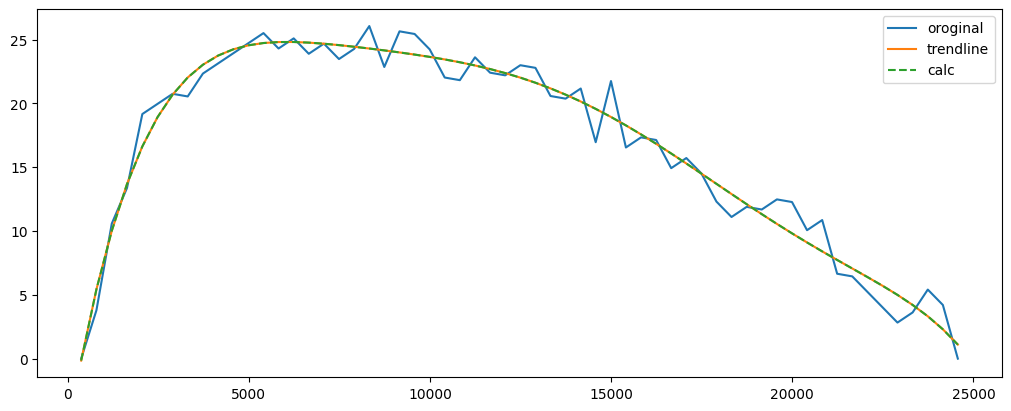

In [ ]:
x=df['X']
y = df['Dist'] 
plt.figure(figsize=(10, 4), layout='constrained')
plt.plot(x, y, label='oroginal')
#calculate equation for trendline
z = np.polyfit(x, y, 6)
p = np.poly1d(z)
c, stats = P.polyfit(x,y,6,full=True)
#add trendline to plot
plt.plot(x, p(x), label='trendline')
plt.plot(x,df['dist_calc'],label='calc', linestyle='--')
plt.legend()
plt.show()


# Histogram 

In [ ]:
import test1





In [29]:
df = test1.find_circ(100)

df.head()

150.47426846763742


,Areas,X,Y
0,131.5,7905,2557
1,216.5,5401,2557
2,134.0,4998,2557
3,196.0,12918,2556
4,221.5,6658,2557


In [30]:
df.shape

(416, 3)

In [31]:
df.dtypes

Areas    float64
X          int64
Y          int64
dtype: object

In [ ]:
df2 = df['Areas'].hist()

In [41]:
df3 = np.histogram(df['Areas'])
df3

(array([ 50,   6,   0,   0,   0,   6,   0,   0,   7, 347], dtype=int64),
 array([  120. ,  2283.3,  4446.6,  6609.9,  8773.2, 10936.5, 13099.8,
        15263.1, 17426.4, 19589.7, 21753. ]))

In [56]:
import numpy as np
count, division = np.histogram(df['Areas'])
df1 = pd.DataFrame([division, count])
# df1=[[division, count]]
df1.pop(df1.columns[-1])
ddf = df1.T
print(np.max(ddf[1]))
ddf
#np.max(ddf[0])
df1.loc[0,5]



347.0


10936.5

In [58]:
#df1.columns = df1.iloc[0]
df1

,0,1,2,3,4,5,6,7,8,9
0,120.0,2283.3,4446.6,6609.9,8773.2,10936.5,13099.8,15263.1,17426.4,19589.7
1,50.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,7.0,347.0


In [64]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,85.000000,1144.650000,2223.300000,3304.950000,4386.600000,5471.250000,6549.900000,7631.550000,8716.700000,9968.350000
std,49.497475,1610.294273,3144.221013,4673.905113,6203.589213,7729.030672,9262.957412,10792.641512,12317.375864,13606.643658
min,50.000000,6.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,347.000000
25%,67.500000,575.325000,1111.650000,1652.475000,2193.300000,2738.625000,3274.950000,3815.775000,4361.850000,5157.675000
50%,85.000000,1144.650000,2223.300000,3304.950000,4386.600000,5471.250000,6549.900000,7631.550000,8716.700000,9968.350000
75%,102.500000,1713.975000,3334.950000,4957.425000,6579.900000,8203.875000,9824.850000,11447.325000,13071.550000,14779.025000
max,120.000000,2283.300000,4446.600000,6609.900000,8773.200000,10936.500000,13099.800000,15263.100000,17426.400000,19589.700000


# Customtkinter example

In [ ]:
import tkinter
import tkinter.messagebox
import customtkinter

customtkinter.set_appearance_mode("System")  # Modes: "System" (standard), "Dark", "Light"
customtkinter.set_default_color_theme("blue")  # Themes: "blue" (standard), "green", "dark-blue"


class App(customtkinter.CTk):
    def __init__(self):
        super().__init__()

        # configure window
        self.title("CustomTkinter complex_example.py")
        self.geometry(f"{1100}x{580}")

        # configure grid layout (4x4)
        self.grid_columnconfigure(1, weight=1)
        self.grid_columnconfigure((2, 3), weight=0)
        self.grid_rowconfigure((0, 1, 2), weight=1)

        # create sidebar frame with widgets
        self.sidebar_frame = customtkinter.CTkFrame(self, width=140, corner_radius=0)
        self.sidebar_frame.grid(row=0, column=0, rowspan=4, sticky="nsew")
        self.sidebar_frame.grid_rowconfigure(4, weight=1)
        self.logo_label = customtkinter.CTkLabel(self.sidebar_frame, text="CustomTkinter", font=customtkinter.CTkFont(size=20, weight="bold"))
        self.logo_label.grid(row=0, column=0, padx=20, pady=(20, 10))
        self.sidebar_button_1 = customtkinter.CTkButton(self.sidebar_frame, command=self.sidebar_button_event)
        self.sidebar_button_1.grid(row=1, column=0, padx=20, pady=10)
        self.sidebar_button_2 = customtkinter.CTkButton(self.sidebar_frame, command=self.sidebar_button_event)
        self.sidebar_button_2.grid(row=2, column=0, padx=20, pady=10)
        self.sidebar_button_3 = customtkinter.CTkButton(self.sidebar_frame, command=self.sidebar_button_event)
        self.sidebar_button_3.grid(row=3, column=0, padx=20, pady=10)
        self.appearance_mode_label = customtkinter.CTkLabel(self.sidebar_frame, text="Appearance Mode:", anchor="w")
        self.appearance_mode_label.grid(row=5, column=0, padx=20, pady=(10, 0))
        self.appearance_mode_optionemenu = customtkinter.CTkOptionMenu(self.sidebar_frame, values=["Light", "Dark", "System"],
                                                                       command=self.change_appearance_mode_event)
        self.appearance_mode_optionemenu.grid(row=6, column=0, padx=20, pady=(10, 10))
        self.scaling_label = customtkinter.CTkLabel(self.sidebar_frame, text="UI Scaling:", anchor="w")
        self.scaling_label.grid(row=7, column=0, padx=20, pady=(10, 0))
        self.scaling_optionemenu = customtkinter.CTkOptionMenu(self.sidebar_frame, values=["80%", "90%", "100%", "110%", "120%"],
                                                               command=self.change_scaling_event)
        self.scaling_optionemenu.grid(row=8, column=0, padx=20, pady=(10, 20))

        # create main entry and button
        self.entry = customtkinter.CTkEntry(self, placeholder_text="CTkEntry")
        self.entry.grid(row=3, column=1, columnspan=2, padx=(20, 0), pady=(20, 20), sticky="nsew")

        self.main_button_1 = customtkinter.CTkButton(master=self, fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"))
        self.main_button_1.grid(row=3, column=3, padx=(20, 20), pady=(20, 20), sticky="nsew")

        # create textbox
        self.textbox = customtkinter.CTkTextbox(self, width=250)
        self.textbox.grid(row=0, column=1, padx=(20, 0), pady=(20, 0), sticky="nsew")

        # create tabview
        self.tabview = customtkinter.CTkTabview(self, width=250)
        self.tabview.grid(row=0, column=2, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.tabview.add("CTkTabview")
        self.tabview.add("Tab 2")
        self.tabview.add("Tab 3")
        self.tabview.tab("CTkTabview").grid_columnconfigure(0, weight=1)  # configure grid of individual tabs
        self.tabview.tab("Tab 2").grid_columnconfigure(0, weight=1)

        self.optionmenu_1 = customtkinter.CTkOptionMenu(self.tabview.tab("CTkTabview"), dynamic_resizing=False,
                                                        values=["Value 1", "Value 2", "Value Long Long Long"])
        self.optionmenu_1.grid(row=0, column=0, padx=20, pady=(20, 10))
        self.combobox_1 = customtkinter.CTkComboBox(self.tabview.tab("CTkTabview"),
                                                    values=["Value 1", "Value 2", "Value Long....."])
        self.combobox_1.grid(row=1, column=0, padx=20, pady=(10, 10))
        self.string_input_button = customtkinter.CTkButton(self.tabview.tab("CTkTabview"), text="Open CTkInputDialog",
                                                           command=self.open_input_dialog_event)
        self.string_input_button.grid(row=2, column=0, padx=20, pady=(10, 10))
        self.label_tab_2 = customtkinter.CTkLabel(self.tabview.tab("Tab 2"), text="CTkLabel on Tab 2")
        self.label_tab_2.grid(row=0, column=0, padx=20, pady=20)

        # create radiobutton frame
        self.radiobutton_frame = customtkinter.CTkFrame(self)
        self.radiobutton_frame.grid(row=0, column=3, padx=(20, 20), pady=(20, 0), sticky="nsew")
        self.radio_var = tkinter.IntVar(value=0)
        self.label_radio_group = customtkinter.CTkLabel(master=self.radiobutton_frame, text="CTkRadioButton Group:")
        self.label_radio_group.grid(row=0, column=2, columnspan=1, padx=10, pady=10, sticky="")
        self.radio_button_1 = customtkinter.CTkRadioButton(master=self.radiobutton_frame, variable=self.radio_var, value=0)
        self.radio_button_1.grid(row=1, column=2, pady=10, padx=20, sticky="n")
        self.radio_button_2 = customtkinter.CTkRadioButton(master=self.radiobutton_frame, variable=self.radio_var, value=1)
        self.radio_button_2.grid(row=2, column=2, pady=10, padx=20, sticky="n")
        self.radio_button_3 = customtkinter.CTkRadioButton(master=self.radiobutton_frame, variable=self.radio_var, value=2)
        self.radio_button_3.grid(row=3, column=2, pady=10, padx=20, sticky="n")

        # create checkbox and switch frame
        self.checkbox_slider_frame = customtkinter.CTkFrame(self)
        self.checkbox_slider_frame.grid(row=1, column=3, padx=(20, 20), pady=(20, 0), sticky="nsew")
        self.checkbox_1 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_1.grid(row=1, column=0, pady=(20, 10), padx=20, sticky="n")
        self.checkbox_2 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_2.grid(row=2, column=0, pady=10, padx=20, sticky="n")
        self.switch_1 = customtkinter.CTkSwitch(master=self.checkbox_slider_frame, command=lambda: print("switch 1 toggle"))
        self.switch_1.grid(row=3, column=0, pady=10, padx=20, sticky="n")
        self.switch_2 = customtkinter.CTkSwitch(master=self.checkbox_slider_frame)
        self.switch_2.grid(row=4, column=0, pady=(10, 20), padx=20, sticky="n")

        # create slider and progressbar frame
        self.slider_progressbar_frame = customtkinter.CTkFrame(self, fg_color="transparent")
        self.slider_progressbar_frame.grid(row=1, column=1, columnspan=2, padx=(20, 0), pady=(20, 0), sticky="nsew")
        self.slider_progressbar_frame.grid_columnconfigure(0, weight=1)
        self.slider_progressbar_frame.grid_rowconfigure(4, weight=1)
        self.seg_button_1 = customtkinter.CTkSegmentedButton(self.slider_progressbar_frame)
        self.seg_button_1.grid(row=0, column=0, padx=(20, 10), pady=(10, 10), sticky="ew")
        self.progressbar_1 = customtkinter.CTkProgressBar(self.slider_progressbar_frame)
        self.progressbar_1.grid(row=1, column=0, padx=(20, 10), pady=(10, 10), sticky="ew")
        self.progressbar_2 = customtkinter.CTkProgressBar(self.slider_progressbar_frame)
        self.progressbar_2.grid(row=2, column=0, padx=(20, 10), pady=(10, 10), sticky="ew")
        self.slider_1 = customtkinter.CTkSlider(self.slider_progressbar_frame, from_=0, to=1, number_of_steps=4)
        self.slider_1.grid(row=3, column=0, padx=(20, 10), pady=(10, 10), sticky="ew")
        self.slider_2 = customtkinter.CTkSlider(self.slider_progressbar_frame, orientation="vertical")
        self.slider_2.grid(row=0, column=1, rowspan=5, padx=(10, 10), pady=(10, 10), sticky="ns")
        self.progressbar_3 = customtkinter.CTkProgressBar(self.slider_progressbar_frame, orientation="vertical")
        self.progressbar_3.grid(row=0, column=2, rowspan=5, padx=(10, 20), pady=(10, 10), sticky="ns")

        # set default values
        self.sidebar_button_3.configure(state="disabled", text="Disabled CTkButton")
        self.checkbox_2.configure(state="disabled")
        self.switch_2.configure(state="disabled")
        self.checkbox_1.select()
        self.switch_1.select()
        self.radio_button_3.configure(state="disabled")
        self.appearance_mode_optionemenu.set("Dark")
        self.scaling_optionemenu.set("100%")
        self.optionmenu_1.set("CTkOptionmenu")
        self.combobox_1.set("CTkComboBox")
        self.slider_1.configure(command=self.progressbar_2.set)
        self.slider_2.configure(command=self.progressbar_3.set)
        self.progressbar_1.configure(mode="indeterminnate")
        self.progressbar_1.start()
        self.textbox.insert("0.0", "CTkTextbox\n\n" + "Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua.\n\n" * 20)
        self.seg_button_1.configure(values=["CTkSegmentedButton", "Value 2", "Value 3"])
        self.seg_button_1.set("Value 2")

    def open_input_dialog_event(self):
        dialog = customtkinter.CTkInputDialog(text="Type in a number:", title="CTkInputDialog")
        print("CTkInputDialog:", dialog.get_input())

    def change_appearance_mode_event(self, new_appearance_mode: str):
        customtkinter.set_appearance_mode(new_appearance_mode)

    def change_scaling_event(self, new_scaling: str):
        new_scaling_float = int(new_scaling.replace("%", "")) / 100
        customtkinter.set_widget_scaling(new_scaling_float)

    def sidebar_button_event(self):
        print("sidebar_button click")


if __name__ == "__main__":
    app = App()
    app.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\asorkin\Anaconda3\envs\Ptn-39\lib\tkinter\__init__.py", line 1889, in __call__
    try:
KeyboardInterrupt


In [ ]:
import numpy as np

arr = [range(5)]
arr